# Importing Libraries #

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
gerindra = pd.read_excel('gerindra.xlsx')
pdip = pd.read_excel('pdip.xlsx')
parpol = pd.read_excel('parpol.xlsx')
pilpres = pd.read_excel('pilpres2024.xlsx')
golkar = pd.read_excel('golkar.xlsx')

# Data Acquisition #

In [3]:
# Menggabungkan data
dataset = pd.concat([gerindra, pdip, parpol, pilpres, golkar])

# Data Understanding #

In [4]:
dataset.head()

,created_at,id,id_str,full_text,label,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,Unnamed: 17
0,Wed May 31 23:21:13 +0000 2023,1664049424052678912,1664049424052678912,Ketua DPD Gerindra Lampung: Pancasila Ideologi...,positif,0,0,1,0,NaN,in,465423257,1664049424052678912,1664049424052678912,NaN,NaN,haelamarie,NaN
1,Wed May 31 23:29:40 +0000 2023,1664051549889507072,1664051549889507072,@hasannurdin209 @Bambangmulyonoo @prabowo @Ger...,negatif,0,0,0,0,NaN,in,1518142342858904064,1663547149072867072,1663547149072867072,NaN,NaN,SarwaniSarwan15,NaN
2,Wed May 31 23:21:09 +0000 2023,1664049403789967104,1664049403789967104,"Rapat Paripurna DPRD Sulteng, Fraksi Gerindra ...",positif,0,0,1,0,NaN,in,465423257,1664049403789967104,1664049403789967104,NaN,NaN,haelamarie,NaN
3,Wed May 31 23:21:10 +0000 2023,1664049410257613056,1664049410257613056,"Ketua RT Ribut dengan Pemilik Ruko di Pluit, G...",positif,0,0,1,0,NaN,in,465423257,1664049410257613056,1664049410257613056,NaN,NaN,haelamarie,NaN
4,Wed May 31 23:31:57 +0000 2023,1664052122881768960,1664052122881768960,@UyokBack @are_inismyname @prabowo @Gerindra @...,negatif,0,0,0,0,NaN,in,1604820700615021056,1663916601391960064,1663916601391960064,NaN,NaN,Yedi_ExTKI,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 92
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           616 non-null    object 
 1   id                   616 non-null    int64  
 2   id_str               616 non-null    int64  
 3   full_text            615 non-null    object 
 4   label                616 non-null    object 
 5   quote_count          616 non-null    object 
 6   reply_count          616 non-null    int64  
 7   retweet_count        616 non-null    int64  
 8   favorite_count       616 non-null    int64  
 9   geo                  1 non-null      float64
 10  lang                 615 non-null    object 
 11  user_id_str          616 non-null    object 
 12  conversation_id      616 non-null    int64  
 13  conversation_id_str  616 non-null    int64  
 14  media_url_https      136 non-null    object 
 15  media_type           135 non-null    object 
 

In [6]:
dataset.isnull().sum()

# Data Preprocessing #

Mereduksi atribut

In [7]:
# Menghapus kolom yang tidak diperlukan
dataset.drop(['id', 'id_str', 'geo', 'lang', 'user_id_str', 'conversation_id', 'conversation_id_str', 'media_url_https', 'media_type', 'username', 'Unnamed: 17'], axis=1, inplace=True)

In [8]:
dataset.head()

,created_at,full_text,label,quote_count,reply_count,retweet_count,favorite_count
0,Wed May 31 23:21:13 +0000 2023,Ketua DPD Gerindra Lampung: Pancasila Ideologi...,positif,0,0,1,0
1,Wed May 31 23:29:40 +0000 2023,@hasannurdin209 @Bambangmulyonoo @prabowo @Ger...,negatif,0,0,0,0
2,Wed May 31 23:21:09 +0000 2023,"Rapat Paripurna DPRD Sulteng, Fraksi Gerindra ...",positif,0,0,1,0
3,Wed May 31 23:21:10 +0000 2023,"Ketua RT Ribut dengan Pemilik Ruko di Pluit, G...",positif,0,0,1,0
4,Wed May 31 23:31:57 +0000 2023,@UyokBack @are_inismyname @prabowo @Gerindra @...,negatif,0,0,0,0


<p>Menghapus data duplikat</p>

In [9]:
dataset.drop_duplicates(subset=['full_text'], inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 0 to 92
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      605 non-null    object
 1   full_text       604 non-null    object
 2   label           605 non-null    object
 3   quote_count     605 non-null    object
 4   reply_count     605 non-null    int64 
 5   retweet_count   605 non-null    int64 
 6   favorite_count  605 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 37.8+ KB


Menghapus nilai null

In [11]:
# mencari index yang mengandung nilai NaN
dataset[dataset.isnull().any(axis=1)].index
# menampilkan data yang mengandung nilai NaN
dataset[dataset.isnull().any(axis=1)]
# menghapus data yang mengandung nilai NaN
dataset.dropna(inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 0 to 92
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      604 non-null    object
 1   full_text       604 non-null    object
 2   label           604 non-null    object
 3   quote_count     604 non-null    object
 4   reply_count     604 non-null    int64 
 5   retweet_count   604 non-null    int64 
 6   favorite_count  604 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 37.8+ KB


# Text Preprocessing #

- Text Filtering

Menghapus tanda baca, emoji, dan angka pada kolom komentar

In [13]:
def textFilter(text):
    import re
    import string
    # case folding
    loweredText = text.lower()
    # remove repeated character
    removeRepeated = re.sub(r'(.)\1+', r'\1\1', loweredText)
    # remove number
    removeNumber = re.sub(r'[^\D]','',removeRepeated)
    # remove url, mention, and hashtag
    clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", removeNumber).split())
    return clean_text
dataset['full_text'] = dataset['full_text'].apply(textFilter)

In [14]:
# KAMUS NORMALISASI
import json
slang = json.load(open('kamus_normalisasi.json'))

def slang_replace(text):
    import re
    for key in slang.keys():
        text = re.sub(r'\b'+key+r'\b',slang[key],text)
    return text

dataset['full_text'] = dataset['full_text'].apply(slang_replace)

In [15]:
dataset

,created_at,full_text,label,quote_count,reply_count,retweet_count,favorite_count
0,Wed May 31 23:21:13 +0000 2023,ketua dpd gerindra lampung pancasila ideologi ...,positif,0,0,1,0
1,Wed May 31 23:29:40 +0000 2023,perjuangan kalau bagus ps gp,negatif,0,0,0,0
2,Wed May 31 23:21:09 +0000 2023,rapat paripurna dprd sulteng fraksi gerindra u...,positif,0,0,1,0
3,Wed May 31 23:21:10 +0000 2023,ketua rt ribut dengan pemilik rumah toko di pl...,positif,0,0,1,0
4,Wed May 31 23:31:57 +0000 2023,inismyname itu dana land clearing nya darimana...,negatif,0,0,0,0
...,...,...,...,...,...,...,...
88,Sat Jun 03 11:51:00 +0000 2023,loyo melulu,negatif,0,0,0,0
89,Sat Jun 03 11:29:05 +0000 2023,gblog,negatif,0,1,0,0
90,Sat Jun 03 11:27:43 +0000 2023,sekangen itu,positif,0,0,0,0
91,Sat Jun 03 11:23:47 +0000 2023,menteri yang sibuk urusan copras capres prabow...,negatif,0,3,1,9


In [16]:
# INDONESIAN STOPWORDS REMOVAL DENGAN SASTRAWI
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def stopwordRemoval(text):
    return stopword.remove(text)
dataset['full_text'] = dataset['full_text'].apply(stopwordRemoval)
dataset

,created_at,full_text,label,quote_count,reply_count,retweet_count,favorite_count
0,Wed May 31 23:21:13 +0000 2023,ketua dpd gerindra lampung pancasila ideologi ...,positif,0,0,1,0
1,Wed May 31 23:29:40 +0000 2023,perjuangan kalau bagus ps gp,negatif,0,0,0,0
2,Wed May 31 23:21:09 +0000 2023,rapat paripurna dprd sulteng fraksi gerindra u...,positif,0,0,1,0
3,Wed May 31 23:21:10 +0000 2023,ketua rt ribut pemilik rumah toko pluit gerind...,positif,0,0,1,0
4,Wed May 31 23:31:57 +0000 2023,inismyname dana land clearing nya darimana but...,negatif,0,0,0,0
...,...,...,...,...,...,...,...
88,Sat Jun 03 11:51:00 +0000 2023,loyo melulu,negatif,0,0,0,0
89,Sat Jun 03 11:29:05 +0000 2023,gblog,negatif,0,1,0,0
90,Sat Jun 03 11:27:43 +0000 2023,sekangen,positif,0,0,0,0
91,Sat Jun 03 11:23:47 +0000 2023,menteri sibuk urusan copras capres prabowo sub...,negatif,0,3,1,9


In [17]:
# INDONESIAN WORD STEMMING DENGAN SASTRAWI
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)
dataset['full_text'] = dataset['full_text'].apply(stemming)
dataset


,created_at,full_text,label,quote_count,reply_count,retweet_count,favorite_count
0,Wed May 31 23:21:13 +0000 2023,ketua dpd gerindra lampung pancasila ideologi ...,positif,0,0,1,0
1,Wed May 31 23:29:40 +0000 2023,juang kalau bagus ps gp,negatif,0,0,0,0
2,Wed May 31 23:21:09 +0000 2023,rapat paripurna dprd sulteng fraksi gerindra u...,positif,0,0,1,0
3,Wed May 31 23:21:10 +0000 2023,ketua rt ribut milik rumah toko pluit gerindra...,positif,0,0,1,0
4,Wed May 31 23:31:57 +0000 2023,inismyname dana land clearing nya darimana but...,negatif,0,0,0,0
...,...,...,...,...,...,...,...
88,Sat Jun 03 11:51:00 +0000 2023,loyo melulu,negatif,0,0,0,0
89,Sat Jun 03 11:29:05 +0000 2023,gblog,negatif,0,1,0,0
90,Sat Jun 03 11:27:43 +0000 2023,kangen,positif,0,0,0,0
91,Sat Jun 03 11:23:47 +0000 2023,menteri sibuk urus copras capres prabowo subia...,negatif,0,3,1,9


# Data Transformation #

In [18]:
dataset.label.replace("positif", 1 , inplace = True)
dataset.label.replace("negatif", 0 , inplace = True)
dataset.head()

,created_at,full_text,label,quote_count,reply_count,retweet_count,favorite_count
0,Wed May 31 23:21:13 +0000 2023,ketua dpd gerindra lampung pancasila ideologi ...,1,0,0,1,0
1,Wed May 31 23:29:40 +0000 2023,juang kalau bagus ps gp,0,0,0,0,0
2,Wed May 31 23:21:09 +0000 2023,rapat paripurna dprd sulteng fraksi gerindra u...,1,0,0,1,0
3,Wed May 31 23:21:10 +0000 2023,ketua rt ribut milik rumah toko pluit gerindra...,1,0,0,1,0
4,Wed May 31 23:31:57 +0000 2023,inismyname dana land clearing nya darimana but...,0,0,0,0,0


In [20]:
# Df info dari dataset yang sudah dibersihkan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 0 to 92
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      604 non-null    object
 1   full_text       604 non-null    object
 2   label           604 non-null    int64 
 3   quote_count     604 non-null    object
 4   reply_count     604 non-null    int64 
 5   retweet_count   604 non-null    int64 
 6   favorite_count  604 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 37.8+ KB


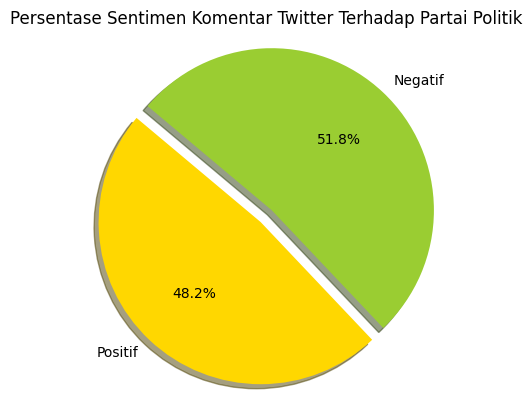

Total data:  604


In [21]:
# Plot diagram pie dari total persen label
labels = 'Positif', 'Negatif'
sizes = [dataset.label[dataset['label'] == 1].count(), dataset.label[dataset['label'] == 0].count()]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Sentimen Komentar Twitter Terhadap Partai Politik')
plt.axis('equal')
plt.show()
print('Total data: ', dataset.shape[0])

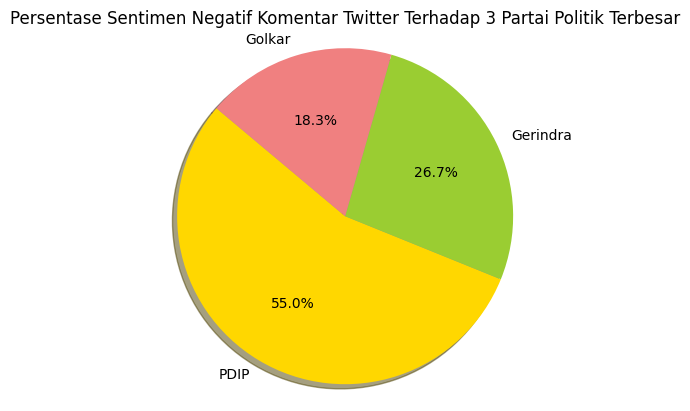

In [22]:
# Menghitung sentimen negatif dengan kata kunci 3 nama partai politik
kata_kunci = ['pdip', 'gerindra', 'golkar', 'golongan karya'];
count = {'pdip': 0, 'gerindra': 0, 'golkar': 0}
for i in range(len(dataset)):
    for kata in kata_kunci:
        if kata in dataset['full_text'].iloc[i].lower():
            count[kata] += 1
# Plot diagram pie dari total persen label
labels = 'PDIP', 'Gerindra', 'Golkar'
sizes = [count['pdip'], count['gerindra'], count['golkar']]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Sentimen Negatif Komentar Twitter Terhadap 3 Partai Politik Terbesar')
plt.axis('equal')
plt.show()

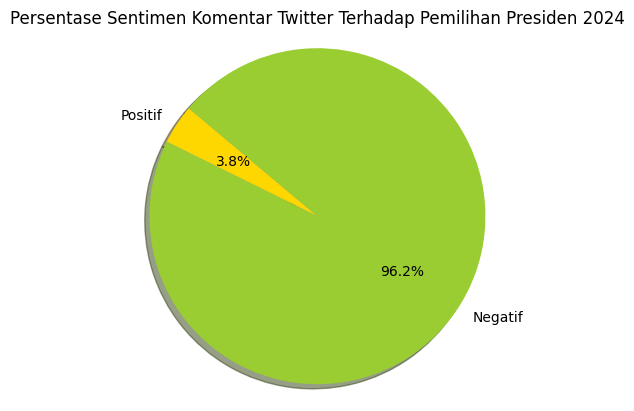

In [23]:
# Menghitung sentimen negatif dengan kata kunci pilpres
kata_kunci = ['pilpres', 'pilpres2024','2024','pemilihan presiden', 'pemilu'];
count = {'positif': 0, 'negatif': 0}
for i in range(len(dataset)):
    for kata in kata_kunci:
        if kata in dataset['full_text'].iloc[i].lower():
            count['positif'] += 1
        else:
            count['negatif'] += 1
# Plot diagram pie dari total persen label
labels = 'Positif', 'Negatif'
sizes = [count['positif'], count['negatif']]
colors = ['gold', 'yellowgreen']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Sentimen Komentar Twitter Terhadap Pemilihan Presiden 2024')
plt.axis('equal')
plt.show()

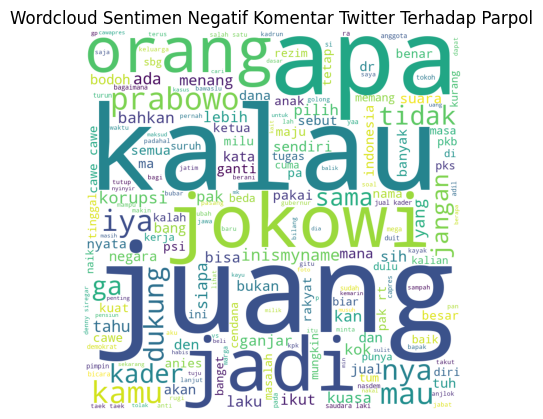

In [24]:
# Membuat kata yang sering muncul atau wordcloud yang bersentimen negatif
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Membuat wordcloud
stopwords = set(STOPWORDS)
stopwords.add('amp')
stopwords.add('id')
stopwords.add('pilpres')
stopwords.add('pilpres2024')
stopwords.add('2024')
stopwords.add('pemilihan')
stopwords.add('presiden')
stopwords.add('pemilu')
stopwords.add('pemilu2024')
stopwords.add('parpol')
stopwords.add('partai')
stopwords.add('politik')
stopwords.add('pdip')
stopwords.add('gerindra')
stopwords.add('golkar')

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(' '.join(dataset['full_text'].loc[dataset['label'] == 0]))

# Plot wordcloud
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.title('Wordcloud Sentimen Negatif Komentar Twitter Terhadap Parpol')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Data Modeling #

In [25]:
# Split data X dan y
X = dataset['full_text']
y = dataset['label']

In [26]:
# Split data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

# Classification with Naive Bayes

In [27]:
# Mengubah data menjadi bentuk vektor
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [28]:
# Menggunakan algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

- Evaluasi Model Performance (Cross Validation)

In [29]:
# Evaluasi kinerja model menggunakan cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print('Akurasi CV: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))



Akurasi CV: 0.793 +/- 0.052


In [30]:
# Memprediksi data test
y_pred = model.predict(X_test)

In [31]:
df_pred = pd.DataFrame({'Input': X_test, 'Actual': y_test, 'Predicted': y_pred})
df_pred

,Input,Actual,Predicted
55,"(0, 2440)\t0.3670829267078912\n (0, 1695)\t...",0,0
13,"(0, 2252)\t0.7071067811865475\n (0, 1913)\t...",0,1
16,"(0, 2437)\t0.20750615964310082\n (0, 2366)\...",1,1
50,"(0, 2222)\t0.3237538184873592\n (0, 1426)\t...",1,1
38,"(0, 2314)\t0.22199433514503547\n (0, 2260)\...",0,0
...,...,...,...
85,"(0, 2307)\t0.3665006327069013\n (0, 1695)\t...",0,0
105,"(0, 2319)\t0.2624764752027587\n (0, 2178)\t...",1,0
36,"(0, 2212)\t0.3427524089645461\n (0, 1902)\t...",1,1
158,"(0, 2249)\t0.44853452343695666\n (0, 1800)\...",1,1


In [32]:
print(df_pred['Actual'].value_counts())
print(df_pred['Predicted'].value_counts())

Actual
0    63
1    58
Name: count, dtype: int64
Predicted
0    67
1    54
Name: count, dtype: int64


# Evaluasi Akhir

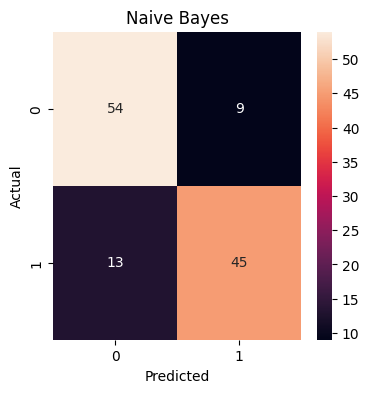

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        63
           1       0.83      0.78      0.80        58

    accuracy                           0.82       121
   macro avg       0.82      0.82      0.82       121
weighted avg       0.82      0.82      0.82       121

